In [1]:
setwd('~/Downloads')

In [2]:
df <- read.table('AT.csv',header=TRUE,sep=",",dec=".",na.strings=c(""," ",NA))

## Task 1

The first thing that I noticed is that people who don't have smartphones aren't likely to be in retention. They also had some huge values in the handset age column.

## Task 2

In [3]:
head(df)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,⋯,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<fct>
1,1000004,26,crafts,town,yes,true,6,1,1812,false,⋯,0.00,0.3623978,-6.3307697,0.00,60,0.00,0,0,0,false
2,1000012,36,NA,NA,yes,true,9,4,544,true,⋯,1.67,5.5868263,7.4995603,0.00,53,0.00,0,0,0,false
3,1000034,74,professional,town,yes,false,7,2,138,true,⋯,0.33,0.5000000,-5.9404926,4.33,58,0.00,0,0,3,false
4,1000063,30,NA,suburban,no,false,6,3,122,true,⋯,4.67,8.6296614,-0.0664847,5.33,50,0.33,0,0,0,false
5,1000085,32,NA,town,yes,false,7,8,10,true,⋯,23.00,14.0426848,-7.2085019,14.67,56,0.00,0,0,0,false
6,1000100,40,homemaker,rural,yes,true,7,4,161,true,⋯,7.00,5.3966667,-17.0934212,9.33,54,0.00,0,0,0,false


In [4]:
df$age[which(df$age == 0)] <- NA

We change the 0 value in age to NA because such age is an anomaly. Clients who were just born cannot sign up for telecom services anyway.

In [5]:
count_missing <- function(input_feature) {
    missing_rate <- mean(is.na(input_feature))
    return(missing_rate)
}

In [6]:
count_cardinality <- function(input_feature) {
    cardinality <- length(unique(input_feature))
    return(cardinality)
}

In [7]:
first_quant <- function(arg) {
    answer <- quantile(arg, 0.25, na.rm=TRUE)
    return(answer)
}

In [8]:
third_quant <- function(arg) {
    answer <- quantile(arg, 0.75, na.rm=TRUE)
    return(answer)
}

In [9]:
age_income <- df[,c(2,7)]

In [10]:
cont_count <- apply(age_income,2,length)
cont_missing <- apply(age_income, 2, count_missing)
cont_cardinality <- apply(age_income, 2, count_cardinality)
cont_min <- apply(age_income,2, min,na.rm=TRUE)
first_quantile <- apply(age_income,2,first_quant)
cont_mean <- apply(age_income,2,mean, na.rm=TRUE)
cont_median <- apply(age_income,2,median,na.rm=TRUE)
third_quartile <-apply(age_income,2,third_quant)
cont_max <- apply(age_income,2,max,na.rm=TRUE)
cont_sd <- apply(age_income,2,sd,na.rm=TRUE)

In [11]:
cont_df <- data.frame(cont_count,
                      cont_missing,
                      cont_cardinality,
                      cont_min,
                     first_quantile,
                     cont_mean,
                     cont_median,
                     third_quartile,
                     cont_max,
                     cont_sd)
rownames(cont_df) <- NULL

In [12]:
head(cont_df)

,cont_count,cont_missing,cont_cardinality,cont_min,first_quantile,cont_mean,cont_median,third_quartile,cont_max,cont_sd
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,10000,0.2942,40,18,34,42.95608,42,52,98,12.359664
2,10000,0.0000,10,0,0,4.29360,5,7,9,3.139902


In [13]:
count_mode <- function(arg) {
   mode <- names(sort(table(arg),decreasing=TRUE))[1]
   return(mode)
}

In [14]:
count_mode_frequency <- function(arg) {
    mode_freq <- sort(table(arg),decreasing=TRUE)[1]
    return(mode_freq)
}

In [15]:
count_mode_percentage <- function(data) {
    mode_freq <- count_mode_frequency(data)
    answer <- mode_freq / sum(!is.na(data)) * 100
    return(answer)
}

In [16]:
count_sec_mode <- function(arg) {
   mode <- names(sort(table(arg),decreasing=TRUE))[2]
   return(mode)
}

In [17]:
count_sec_mode_frequency <- function(arg) {
    mode_freq <- sort(table(arg),decreasing=TRUE)[2]
    return(mode_freq)
}

In [18]:
count_sec_mode_percentage <- function(data) {
    mode_freq <- count_sec_mode_frequency(data)
    answer <- mode_freq / sum(!is.na(data)) * 100
    return(answer)
}

In [19]:
occ_churn <- df[,c(3,33)]

In [20]:
head(occ_churn)

,occupation,churn
,<fct>,<fct>
1,crafts,false
2,NA,false
3,professional,false
4,NA,false
5,NA,false
6,homemaker,false


In [21]:
cat_length <- apply(occ_churn, 2, length)
cat_miss <- apply(occ_churn,2,count_missing)
cat_card <- apply(occ_churn, 2,count_cardinality)
cat_mode <- apply(occ_churn, 2,count_mode)
cat_mode_fr <- apply(occ_churn, 2,count_mode_frequency)
cat_mode_per <- apply(occ_churn, 2,count_mode_percentage)
cat_sec_mode <- apply(occ_churn, 2,count_sec_mode)
cat_sec_mode_fr <- apply(occ_churn, 2,count_sec_mode_frequency)
cat_sec_mode_per <- apply(occ_churn, 2,count_sec_mode_percentage)

In [22]:
cat_df <- data.frame(cat_length,
                    cat_miss,
                    cat_card,
                    cat_mode,
                    cat_mode_fr,
                    cat_mode_per,
                    cat_sec_mode,
                    cat_sec_mode_fr,
                    cat_sec_mode_per)
rownames(cat_df) <= NULL

logical(0)

In [23]:
cat_df

,cat_length,cat_miss,cat_card,cat_mode,cat_mode_fr,cat_mode_per,cat_sec_mode,cat_sec_mode_fr,cat_sec_mode_per
,<int>,<dbl>,<int>,<fct>,<int>,<dbl>,<fct>,<int>,<dbl>
occupation,10000,0.74,8,professional,1705,65.57692,crafts,274,10.53846
churn,10000,0.00,2,false,5000,50.00000,true,5000,50.00000


## Task 3

In [24]:
head(df)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,⋯,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<fct>
1,1000004,26,crafts,town,yes,true,6,1,1812,false,⋯,0.00,0.3623978,-6.3307697,0.00,60,0.00,0,0,0,false
2,1000012,36,NA,NA,yes,true,9,4,544,true,⋯,1.67,5.5868263,7.4995603,0.00,53,0.00,0,0,0,false
3,1000034,74,professional,town,yes,false,7,2,138,true,⋯,0.33,0.5000000,-5.9404926,4.33,58,0.00,0,0,3,false
4,1000063,30,NA,suburban,no,false,6,3,122,true,⋯,4.67,8.6296614,-0.0664847,5.33,50,0.33,0,0,0,false
5,1000085,32,NA,town,yes,false,7,8,10,true,⋯,23.00,14.0426848,-7.2085019,14.67,56,0.00,0,0,0,false
6,1000100,40,homemaker,rural,yes,true,7,4,161,true,⋯,7.00,5.3966667,-17.0934212,9.33,54,0.00,0,0,0,false


In [25]:
sum(is.na(df))

[1] 15118

As we can see, there are many missing values in the dataset. Let's explore them in detail.

In [26]:
library(naniar)
library(ggplot2)

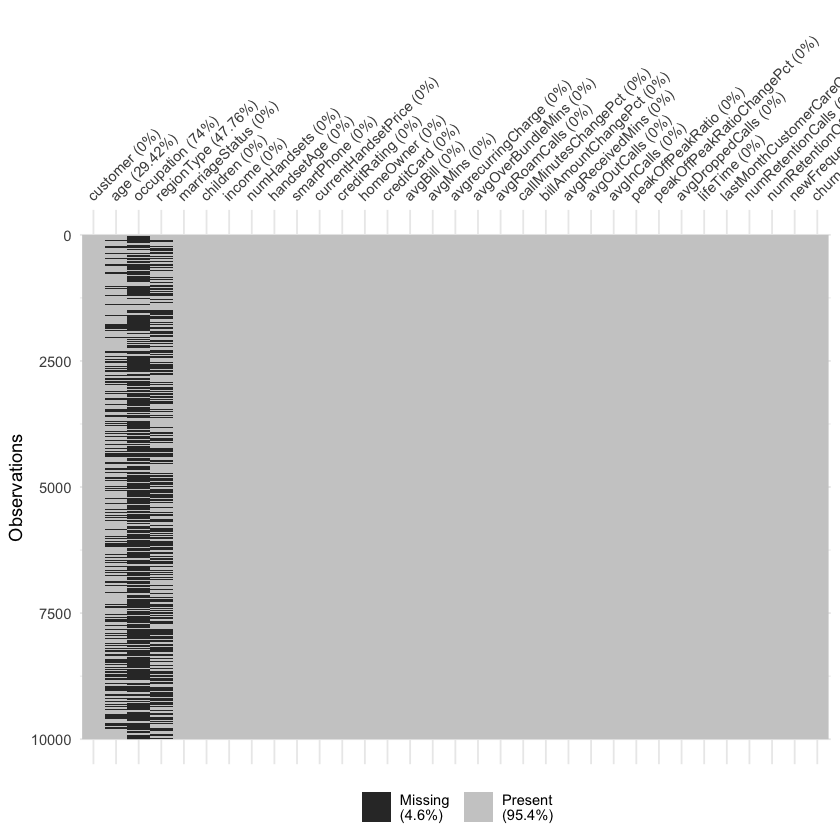

In [27]:
vis_miss(df)

As we can see, most of our missing values come from the following features:
<br>
<li>Age</li>
<li>Occupation</li>
<li>regionType</li>

Warning message:
“Removed 2942 rows containing non-finite values (stat_boxplot).”


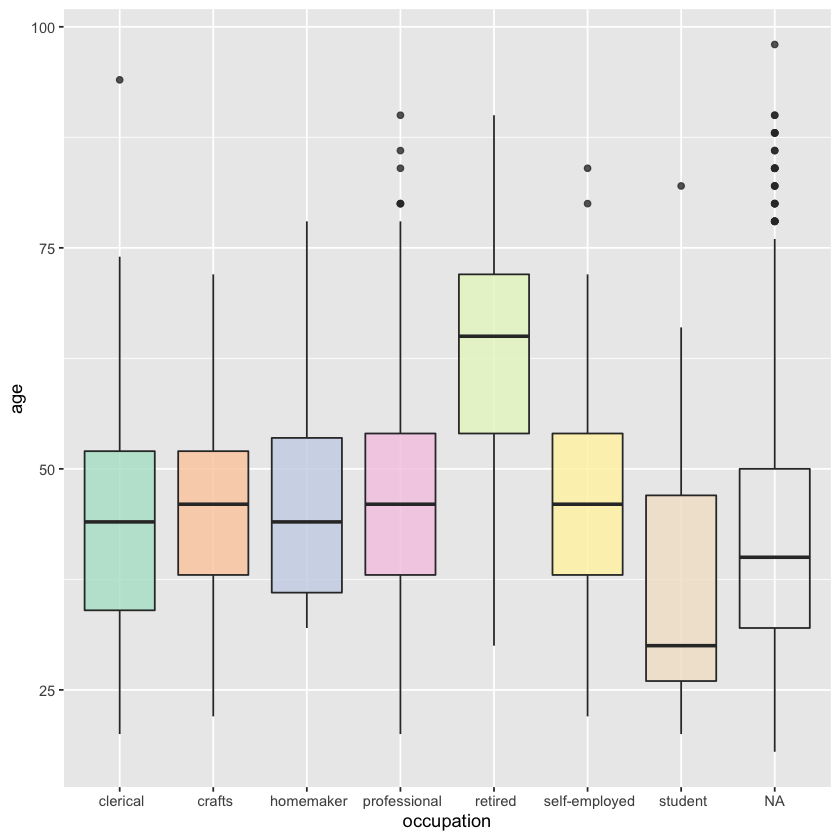

In [28]:
ggplot(df,aes(x=occupation,y=age,fill=occupation)) + 
    geom_boxplot(alpha=0.8) + 
    theme(legend.position="none") +
    scale_fill_brewer(palette="Pastel2")

While there are certain outliers in the age groups by occupation, none of them is too unusual: the outlier age in clerical makes sense, as clerics do not usually retire and continue their services for their entire life. Same goes for professionals, unless they decide to retire. Even the outlier age in student may be alright, as there were cases of old people attending the university. We should also note that none of the age values exceed 100, therefore it is within an acceptable range of values. <br>

Now let's see the summary by variables.

In [29]:
summary(df)

    customer            age                 occupation       regionType  
 Min.   :1000001   Min.   :18.00    professional :1705    suburban:3085  
 1st Qu.:1025200   1st Qu.:34.00    crafts       : 274    town    :1483  
 Median :1049833   Median :42.00    clerical     : 210    rural   : 491  
 Mean   :1049974   Mean   :42.96    self-employed: 181    unknown :  83  
 3rd Qu.:1074990   3rd Qu.:52.00    retired      : 133    s       :  55  
 Max.   :1099988   Max.   :98.00   (Other)       :  97   (Other)  :  27  
                   NA's   :2942    NA's          :7400   NA's     :4776  
  marriageStatus   children        income       numHandsets    
  no     :2486    false:7559   Min.   :0.000   Min.   : 1.000  
  unknown:3920    true :2441   1st Qu.:0.000   1st Qu.: 1.000  
  yes    :3594                 Median :5.000   Median : 1.000  
                               Mean   :4.294   Mean   : 1.804  
                               3rd Qu.:7.000   3rd Qu.: 2.000  
                        

Let's make a hypothetical breakdown by each feature. Note that we will not consider Customer, Age, and Occupation because they were studied already in the examples above:

1. *Region Type* has a value redundancy "s". Also there are regions such as "unknown" and "Other". At least, we should merge the redundant values.
2. *NumHandsets* value of 21 is definitely an outlier: people rarely change 21 phones within three years. But we may keep it to see if the company satisfies the this type of client - people who frequently change their phones.
3. *HandsetAge* has a negative outlier, which should be removed. Also we should clarify the time unit for the age. Judging by the values, seems like the unit may be in days - wthe only unit that makes sense.
4. *creditCard* has redundancy in its values: there are "f", "no", "false", "t", "true", and "yes" values, which could be reduced to true and false only, or even better - to binary values.
5. *avgMins* has a huge outlier value of 6336.2 minutes a month. However, when translating it into hours a day, it yields 3.5 hours on call a day, which could still be possible for some types of people. We should also see if that value matches with the *avgBill* max value for the consistency purposes. Otherwise, it is an outlier that should be removed. The same principle may be applied to other features that deal with minutes spent on calls such as incalls and outcalls.
6. *avgDroppedCalls* also has a huge outlier value that should be checked for consistency. We should campre it with the amount of time that customer spent over the calls and see if this value makes any sense. Same goes for *lastMonthCustomerCareCalls*.
7. *Churn*,*children* should be changed to binary. *MarriageStatus* should be changed to dummy variables, or if possible, to be reclassified if there is any viable pattern that can help us detect their marriage status from the data.
<br>
<br>
Everything else except for the missing values above seems plausible.




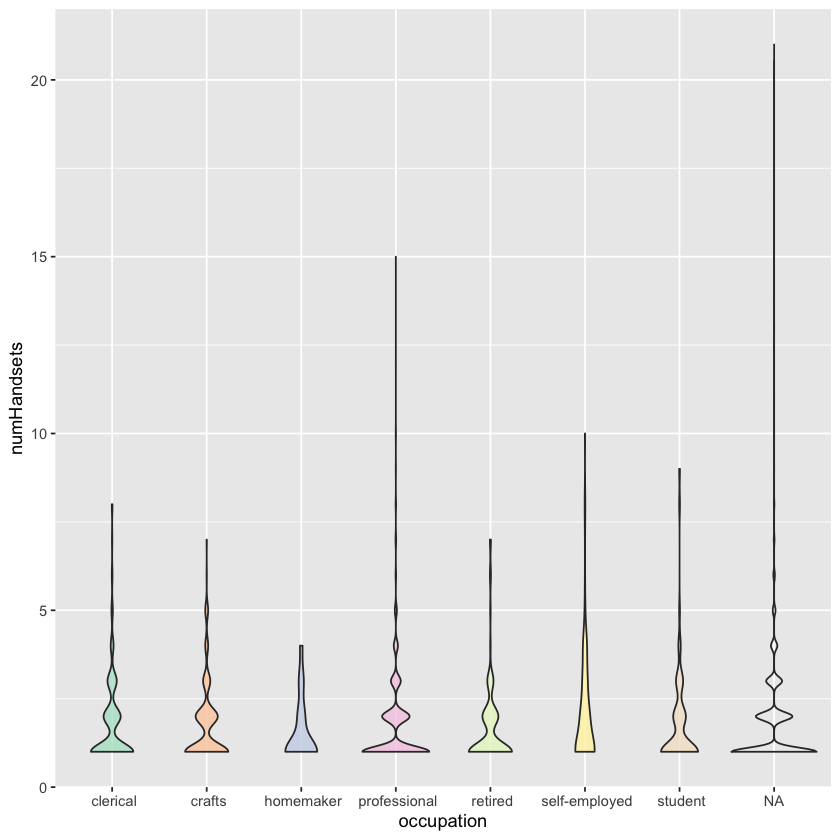

In [30]:
ggplot(df,aes(x=occupation,y=numHandsets,fill=occupation)) + 
    geom_violin(alpha=0.8) + 
    theme(legend.position="none") +
    scale_fill_brewer(palette="Pastel2")

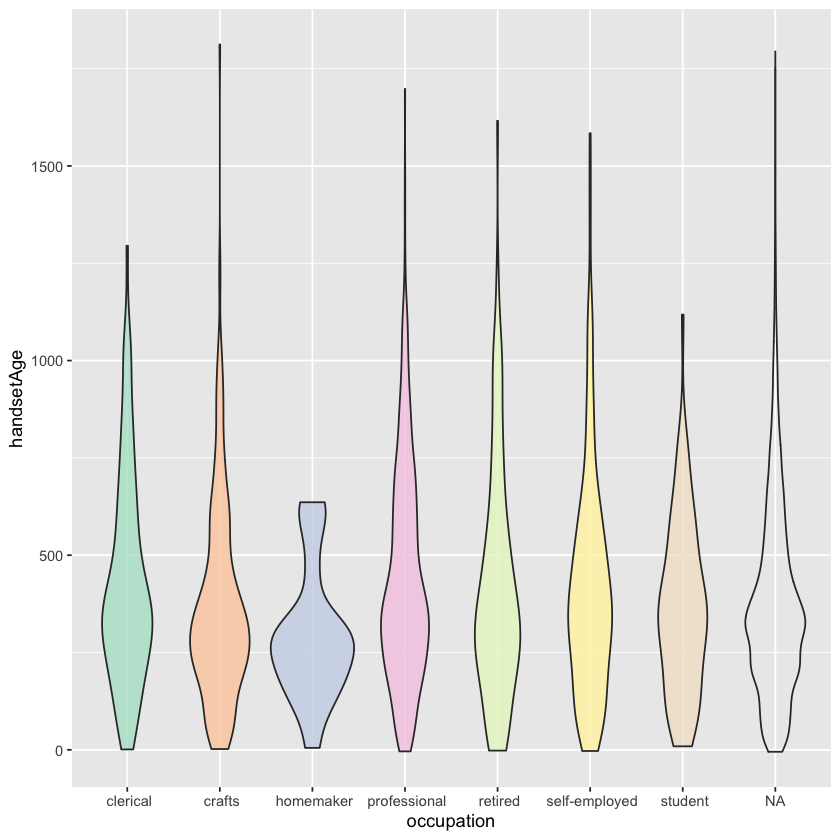

In [31]:
ggplot(df,aes(x=occupation,y=handsetAge,fill=occupation)) + 
    geom_violin(alpha=0.8) + 
    theme(legend.position="none") +
    scale_fill_brewer(palette="Pastel2")

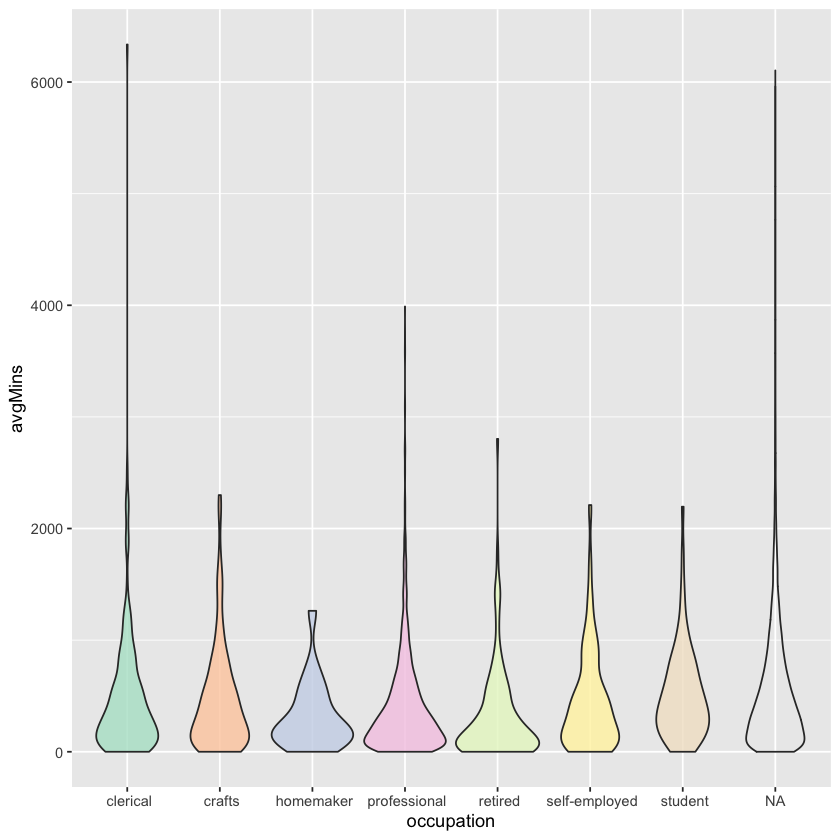

In [32]:
ggplot(df,aes(x=occupation,y=avgMins,fill=occupation)) + 
    geom_violin(alpha=0.8) + 
    theme(legend.position="none") +
    scale_fill_brewer(palette="Pastel2")

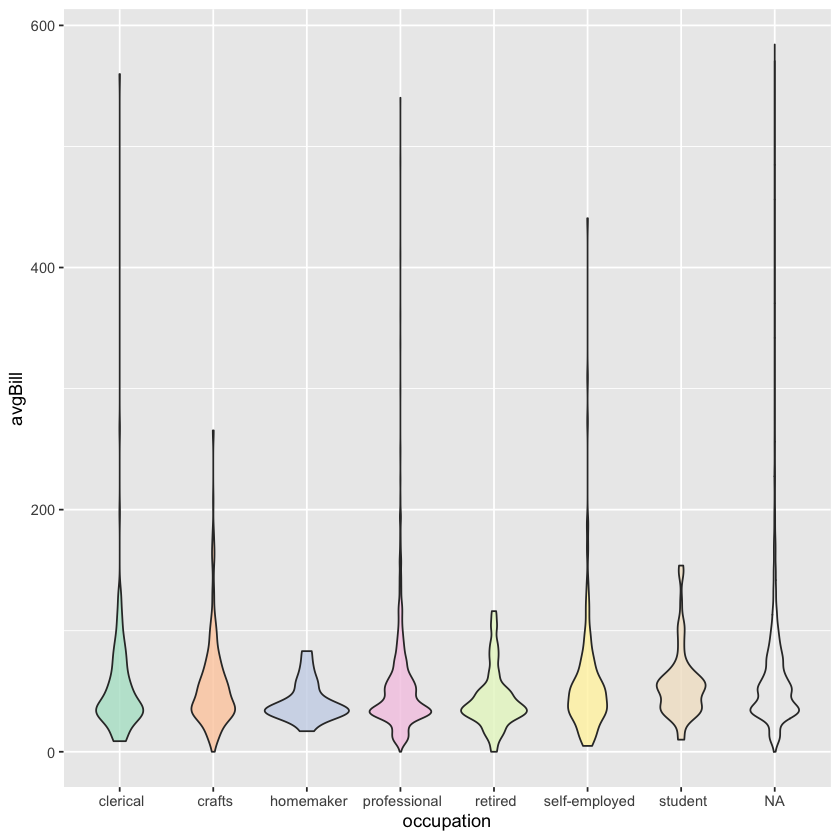

In [33]:
ggplot(df,aes(x=occupation,y=avgBill,fill=occupation)) + 
    geom_violin(alpha=0.8) + 
    theme(legend.position="none") +
    scale_fill_brewer(palette="Pastel2")

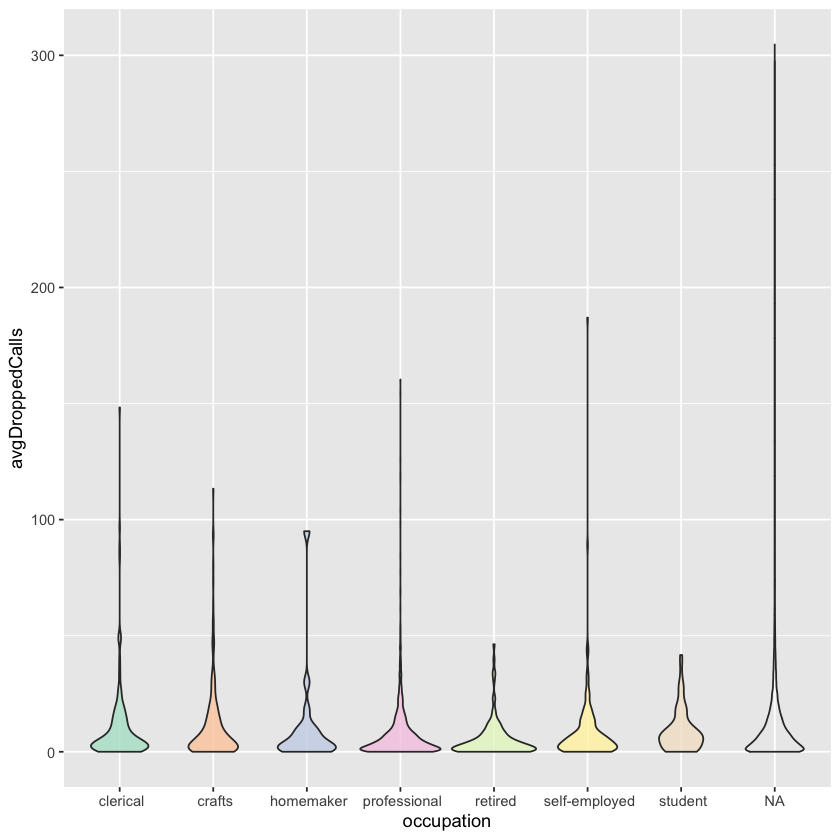

In [34]:
ggplot(df,aes(x=occupation,y=avgDroppedCalls,fill=occupation)) + 
    geom_violin(alpha=0.8) + 
    theme(legend.position="none") +
    scale_fill_brewer(palette="Pastel2")

I have used violin plots to better visualize and see the distribution of each feature grouped by the occupation. We can see that there is a significant enough number of outliers that require action. However, we should keep in mind that boxplots simply work well only with normal distribution, and judging by the images produced from violin plots, we can see that the distribution of data is clearly far from normal. Taking into the account the points that I have mentioned above, we can say that we should not remove the outliers simply because they don't fit into what we expected. Considering that even the outlier values still seem realistic as well, I have decided to keep them to avoid bias that favors "excluding real-data extremes".


We should also fix the redundant values in *creditCard* and change all True/False values into binaries.

In [35]:
table(df$creditCard)


     f  false     no      t   true    yes 
    61   3146    100    105   6537     51 

In [36]:
df$creditCard <- as.character(df$creditCard) #turning it from factor to character

In [37]:
temp1 <- data.frame(lapply(df$creditCard,function(x) {gsub("(false|no|f)","0",x)}))

In [38]:
temp1 <- data.frame(lapply(temp1,function(x) {gsub("(true|yes|t)","1",x)}))

In [39]:
df$creditCard <- t(temp1) #transposing

In [40]:
table(df$creditCard)


   0    1 
3307 6693 

In [41]:
table(df$regionType)


        r     rural         s  suburban         t      town   unknown 
        7       491        55      3085        20      1483        83 

In [42]:
df$regionType <- as.character(df$regionType)
temp1 <- data.frame(lapply(df$regionType,function(x) {gsub("town","t",x)}))
temp1 <- data.frame(lapply(temp1,function(x) {gsub("rural","r",x)}))
temp1 <- data.frame(lapply(temp1,function(x) {gsub("suburban","s",x)}))
temp1 <- data.frame(lapply(temp1,function(x) {gsub("unknown","Missing",x)}))
df$regionType <- t(temp1)

In [43]:
df$children <- as.character(df$children)
temp1 <- data.frame(lapply(df$children,function(x) {gsub("true","1",x)}))
temp1 <- data.frame(lapply(temp1,function(x) {gsub("false","0",x)}))
df$children <- t(temp1)

In [44]:
df$churn <- as.character(df$churn)
temp1 <- data.frame(lapply(df$churn,function(x) {gsub("true","1",x)}))
temp1 <- data.frame(lapply(temp1,function(x) {gsub("false","0",x)}))
df$churn <- t(temp1)

In [45]:
df$homeOwner <- as.character(df$homeOwner)
temp1 <- data.frame(lapply(df$homeOwner,function(x) {gsub("true","1",x)}))
temp1 <- data.frame(lapply(temp1,function(x) {gsub("false","0",x)}))
df$homeOwner <- t(temp1)

In [46]:
df$smartPhone <- as.character(df$smartPhone)
temp1 <- data.frame(lapply(df$smartPhone,function(x) {gsub("true","1",x)}))
temp1 <- data.frame(lapply(temp1,function(x) {gsub("false","0",x)}))
df$smartPhone <- t(temp1)

Let's talk about the missing data. Ideally, we could have done some data imputation so that we can still work with the data. The data missings here are not Missing Completely At Random (MCAR), they are rather Missing At Random (MAR) because the missing data still has on effect on other variables in our dataset. The data imputation approach here would not work properly, especially if we consider the common imputation methods such as filling with mode,median, and other popular alternatives. This is because the amount of missing data is still huge in some variables, and deleting the variables is still not preferred because we risk losing essential data for further use. Therefore, it seems an optimal decision to make a new category for the missing data within each variable and keep it this way.

In [47]:
df$occupation <- as.character(df$occupation)
df$regionType <- as.character(df$regionType)

In [48]:
df$age[is.na(df$age)] <- mean(df$age, na.rm = TRUE)

In [49]:
df[is.na(df)] <- 'Missing'

Warning message:
“Raster pixels are placed at uneven horizontal intervals and will be shifted. Consider using geom_tile() instead.”
Warning message:
“Removed 50000 rows containing missing values (geom_raster).”


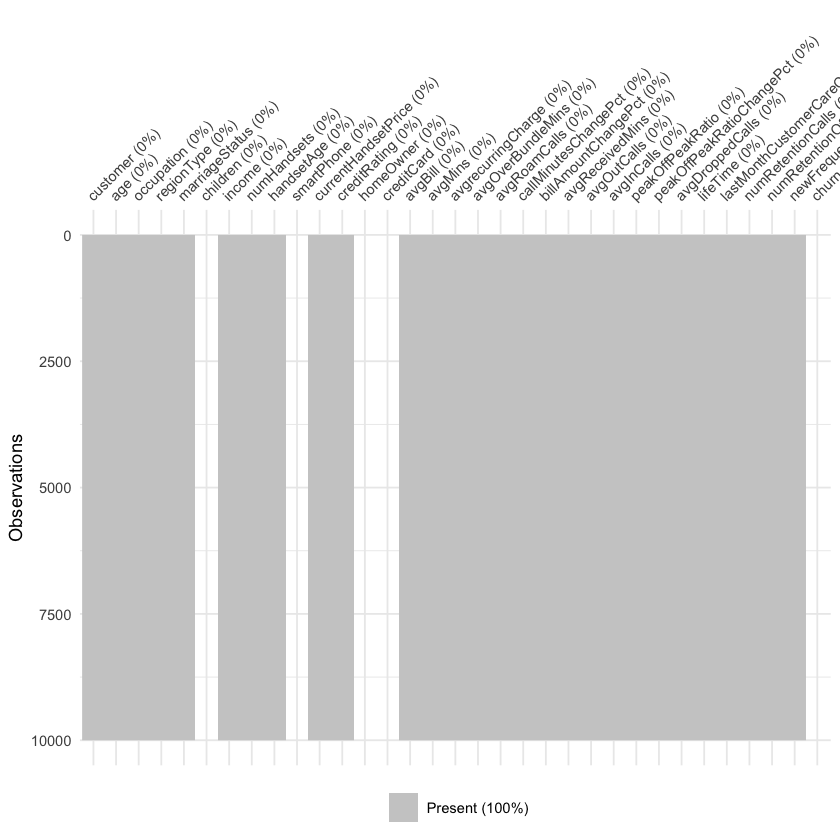

In [50]:
vis_miss(df)

In [51]:
df <- df[df$handsetAge > 0, ]
df <- df[df$regionType != "s", ]

In [52]:
head(df)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,⋯,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
,<int>,<dbl>,<chr>,<chr>,<fct>,"<chr[,1]>",<int>,<int>,<int>,"<chr[,1]>",⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,"<chr[,1]>"
1,1000004,26,crafts,t,yes,1,6,1,1812,0,⋯,0.00,0.3623978,-6.3307697,0.00,60,0.00,0,0,0,0
2,1000012,36,Missing,Missing,yes,1,9,4,544,1,⋯,1.67,5.5868263,7.4995603,0.00,53,0.00,0,0,0,0
3,1000034,74,professional,t,yes,0,7,2,138,1,⋯,0.33,0.5000000,-5.9404926,4.33,58,0.00,0,0,3,0
4,1000063,30,Missing,s,no,0,6,3,122,1,⋯,4.67,8.6296614,-0.0664847,5.33,50,0.33,0,0,0,0
5,1000085,32,Missing,t,yes,0,7,8,10,1,⋯,23.00,14.0426848,-7.2085019,14.67,56,0.00,0,0,0,0
6,1000100,40,homemaker,r,yes,1,7,4,161,1,⋯,7.00,5.3966667,-17.0934212,9.33,54,0.00,0,0,0,0


In [53]:
install.packages("fastDummies")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [54]:
library(fastDummies)

In [55]:
df$marriageStatus <- as.character(df$marriageStatus)

Now we will transform our categorical features into Dummy features.

In [56]:
dummy_df <- dummy_cols(df, select_columns=c('occupation','marriageStatus','creditRating','regionType'))

In [57]:
drops = c('occupation','marriageStatus','creditRating','regionType')
dummy_df <- dummy_df[ ,!(names(dummy_df) %in% drops)]

In [58]:
head(dummy_df)

,customer,age,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,homeOwner,creditCard,⋯,creditRating_ C,creditRating_ D,creditRating_ E,creditRating_ F,creditRating_ G,regionType_ Missing,regionType_ r,regionType_ s,regionType_ t,regionType_Missing
,<int>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1000004,26,1,6,1,1812,0,0.00,1,1,⋯,1,0,0,0,0,0,0,0,1,0
2,1000012,36,1,9,4,544,1,79.99,0,1,⋯,0,0,0,0,0,0,0,0,0,1
3,1000034,74,0,7,2,138,1,29.99,0,1,⋯,0,0,0,0,0,0,0,0,1,0
4,1000063,30,0,6,3,122,1,9.99,0,1,⋯,1,0,0,0,0,0,0,1,0,0
5,1000085,32,0,7,8,10,1,129.99,0,1,⋯,0,0,0,0,0,0,0,0,1,0
6,1000100,40,1,7,4,161,1,9.99,0,1,⋯,0,0,0,0,0,0,1,0,0,0


In [59]:
write.csv(dummy_df, "~/Downloads/AT2_20160857.csv",row.names=FALSE)

## Task 4

In [59]:
install.packages("reshape2")

Warning message in install.packages("reshape2"):
“installation of package ‘reshape2’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [60]:
head(dummy_df)

,customer,age,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,homeOwner,creditCard,⋯,creditRating_ C,creditRating_ D,creditRating_ E,creditRating_ F,creditRating_ G,regionType_ Missing,regionType_ r,regionType_ s,regionType_ t,regionType_Missing
,<int>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1000004,26,1,6,1,1812,0,0.00,1,1,⋯,1,0,0,0,0,0,0,0,1,0
2,1000012,36,1,9,4,544,1,79.99,0,1,⋯,0,0,0,0,0,0,0,0,0,1
3,1000034,74,0,7,2,138,1,29.99,0,1,⋯,0,0,0,0,0,0,0,0,1,0
4,1000063,30,0,6,3,122,1,9.99,0,1,⋯,1,0,0,0,0,0,0,1,0,0
5,1000085,32,0,7,8,10,1,129.99,0,1,⋯,0,0,0,0,0,0,0,0,1,0
6,1000100,40,1,7,4,161,1,9.99,0,1,⋯,0,0,0,0,0,0,1,0,0,0


In [83]:
drops = c('customer')
cormat <- dummy_df[ ,!(names(dummy_df) %in% drops)]

In [84]:
head(cormat)

,age,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,homeOwner,creditCard,avgBill,⋯,creditRating_ C,creditRating_ D,creditRating_ E,creditRating_ F,creditRating_ G,regionType_ Missing,regionType_ r,regionType_ s,regionType_ t,regionType_Missing
,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,26,1,6,1,1812,0,0.00,1,1,38.00,⋯,1,0,0,0,0,0,0,0,1,0
2,36,1,9,4,544,1,79.99,0,1,35.30,⋯,0,0,0,0,0,0,0,0,0,1
3,74,0,7,2,138,1,29.99,0,1,21.15,⋯,0,0,0,0,0,0,0,0,1,0
4,30,0,6,3,122,1,9.99,0,1,91.18,⋯,1,0,0,0,0,0,0,1,0,0
5,32,0,7,8,10,1,129.99,0,1,93.02,⋯,0,0,0,0,0,0,0,0,1,0
6,40,1,7,4,161,1,9.99,0,1,71.86,⋯,0,0,0,0,0,0,1,0,0,0


In [88]:
cormat[] <- lapply(cormat, function(x) {
    if(is.factor(x)) as.numeric(as.character(x)) else x
    if(is.character(x)) as.numeric(as.character(x)) else x
})
sapply(cormat, class)

age                   children 
                 "numeric"                  "numeric" 
                    income                numHandsets 
                 "integer"                  "integer" 
                handsetAge                 smartPhone 
                 "integer"                  "numeric" 
       currentHandsetPrice                  homeOwner 
                 "numeric"                  "numeric" 
                creditCard                    avgBill 
                 "numeric"                  "numeric" 
                   avgMins         avgrecurringCharge 
                 "numeric"                  "numeric" 
         avgOverBundleMins               avgRoamCalls 
                 "numeric"                  "numeric" 
      callMinutesChangePct        billAmountChangePct 
                 "numeric"                  "numeric" 
           avgReceivedMins                avgOutCalls 
                 "numeric"                  "numeric" 
                avgInCalls           peakOffPeakRatio 
                 "numeric"                  "numeric" 
 peakOffPeakRatioChangePct            avgDroppedCalls 
                 "numeric"                  "numeric" 
                  lifeTime lastMonthCustomerCareCalls 
                 "integer"                  "numeric" 
         numRetentionCalls numRetentionOffersAccepted 
                 "integer"                  "integer" 
        newFrequentNumbers                      churn 
                 "integer"                  "numeric" 
      occupation_ clerical         occupation_ crafts 
                 "integer"                  "integer" 
     occupation_ homemaker   occupation_ professional 
                 "integer"                  "integer" 
       occupation_ retired  occupation_ self-employed 
                 "integer"                  "integer" 
       occupation_ student         occupation_Missing 
                 "integer"                  "integer" 
        marriageStatus_ no    marriageStatus_ unknown 
                 "integer"                  "integer" 
       marriageStatus_ yes            creditRating_ A 
                 "integer"                  "integer" 
           creditRating_ B            creditRating_ C 
                 "integer"                  "integer" 
           creditRating_ D            creditRating_ E 
                 "integer"                  "integer" 
           creditRating_ F            creditRating_ G 
                 "integer"                  "integer" 
       regionType_ Missing              regionType_ r 
                 "integer"                  "integer" 
             regionType_ s              regionType_ t 
                 "integer"                  "integer" 
        regionType_Missing 
                 "integer"

In [90]:
cor_mat <- round(cor(cormat),2)


In [92]:
head(cor_mat)

,age,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,homeOwner,creditCard,avgBill,⋯,creditRating_ C,creditRating_ D,creditRating_ E,creditRating_ F,creditRating_ G,regionType_ Missing,regionType_ r,regionType_ s,regionType_ t,regionType_Missing
age,1.00,0.07,0.10,-0.03,0.05,-0.03,-0.05,-0.10,0.05,-0.08,⋯,-0.02,-0.03,-0.05,-0.01,-0.02,0.01,0.03,0.04,0.03,-0.08
children,0.07,1.00,0.33,-0.03,0.02,-0.03,-0.02,-0.36,0.32,-0.05,⋯,-0.02,-0.03,-0.03,-0.04,-0.04,-0.01,0.03,0.08,0.09,-0.15
income,0.10,0.33,1.00,-0.03,0.13,-0.07,-0.04,-0.71,0.70,-0.09,⋯,-0.06,-0.06,-0.14,-0.09,-0.14,-0.02,0.00,0.16,0.08,-0.20
numHandsets,-0.03,-0.03,-0.03,1.00,-0.36,0.10,0.54,0.01,0.00,0.26,⋯,0.05,0.02,0.04,0.04,0.00,0.02,-0.04,-0.01,-0.05,0.06
handsetAge,0.05,0.02,0.13,-0.36,1.00,-0.40,-0.43,-0.10,0.11,-0.24,⋯,-0.05,-0.06,-0.12,0.00,-0.08,-0.02,-0.01,0.05,0.03,-0.06
smartPhone,-0.03,-0.03,-0.07,0.10,-0.40,1.00,0.15,0.07,-0.06,0.12,⋯,0.01,0.03,0.05,-0.01,0.02,0.02,0.00,-0.03,-0.02,0.04


In [136]:
churn_mat = cor_mat['churn', ]

In [135]:
sort(churn_mat, decreasing=TRUE)

churn                 handsetAge 
                      1.00                       0.12 
         numRetentionCalls numRetentionOffersAccepted 
                      0.06                       0.04 
           creditRating_ A            creditRating_ C 
                      0.03                       0.03 
              avgRoamCalls                   lifeTime 
                      0.02                       0.02 
      occupation_ clerical    marriageStatus_ unknown 
                      0.02                       0.02 
             regionType_ r                   children 
                      0.02                       0.01 
                 homeOwner          avgOverBundleMins 
                      0.01                       0.01 
       billAmountChangePct        occupation_ student 
                      0.01                       0.01 
        occupation_Missing            creditRating_ B 
                      0.01                       0.01 
           creditRating_ F              regionType_ t 
                      0.01                       0.01 
 peakOffPeakRatioChangePct         occupation_ crafts 
                      0.00                       0.00 
  occupation_ professional        regionType_ Missing 
                      0.00                       0.00 
             regionType_ s                        age 
                      0.00                      -0.01 
                    income                 creditCard 
                     -0.01                      -0.01 
          peakOffPeakRatio         newFrequentNumbers 
                     -0.01                      -0.01 
     occupation_ homemaker        occupation_ retired 
                     -0.01                      -0.01 
        marriageStatus_ no        marriageStatus_ yes 
                     -0.01                      -0.01 
           creditRating_ G         regionType_Missing 
                     -0.01                      -0.01 
       currentHandsetPrice                    avgBill 
                     -0.02                      -0.02 
           avgDroppedCalls  occupation_ self-employed 
                     -0.02                      -0.02 
lastMonthCustomerCareCalls                numHandsets 
                     -0.03                      -0.04 
      callMinutesChangePct                avgOutCalls 
                     -0.04                      -0.04 
                avgInCalls            creditRating_ D 
                     -0.04                      -0.04 
           avgReceivedMins            creditRating_ E 
                     -0.05                      -0.05 
                   avgMins                 smartPhone 
                     -0.07                      -0.08 
        avgrecurringCharge 
                     -0.08

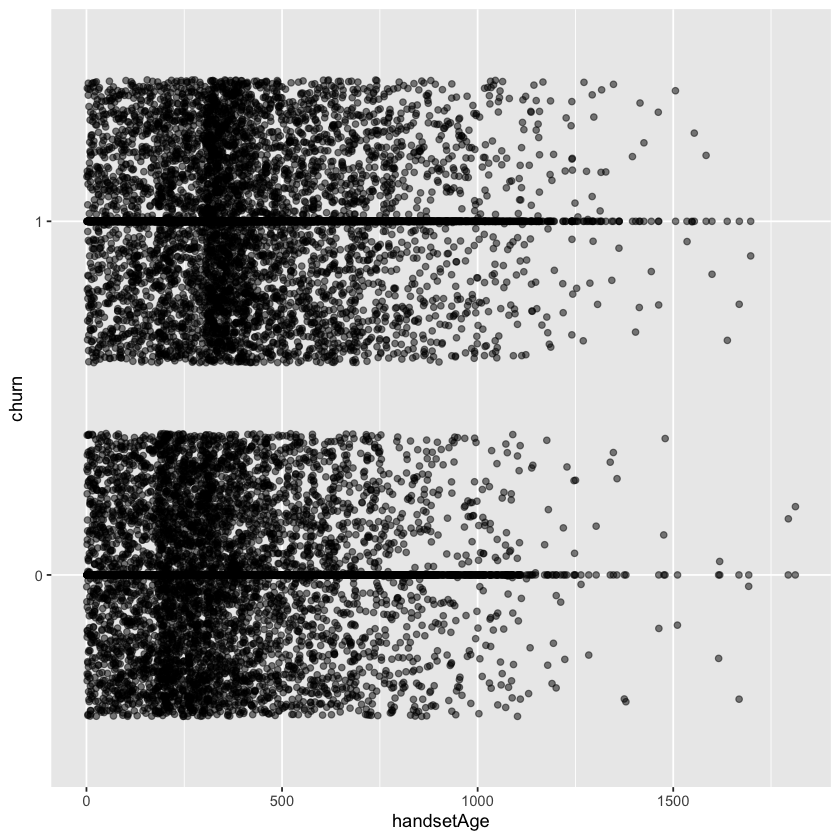

In [156]:
ggplot(dummy_df,aes(x=handsetAge,y=churn)) + geom_point(alpha=0.5) + geom_jitter(alpha=0.5)

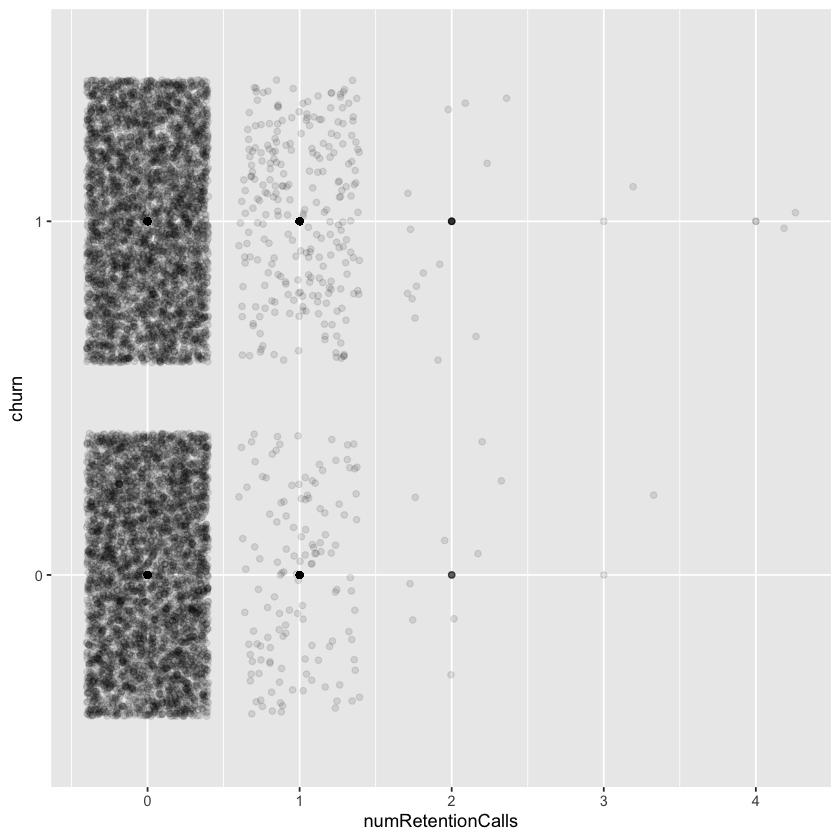

In [158]:
ggplot(dummy_df,aes(x=numRetentionCalls,y=churn)) + geom_point(alpha=0.1) + geom_jitter(alpha=0.1)

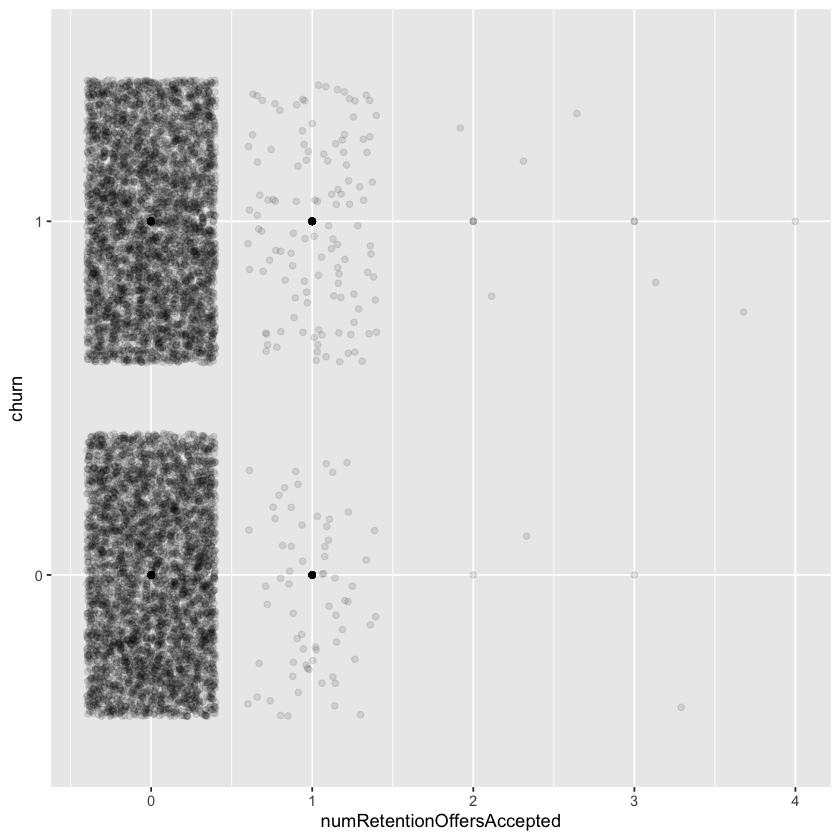

In [165]:
ggplot(dummy_df,aes(x=numRetentionOffersAccepted,y=churn)) + geom_point(alpha=0.1) + geom_jitter(alpha=0.1)

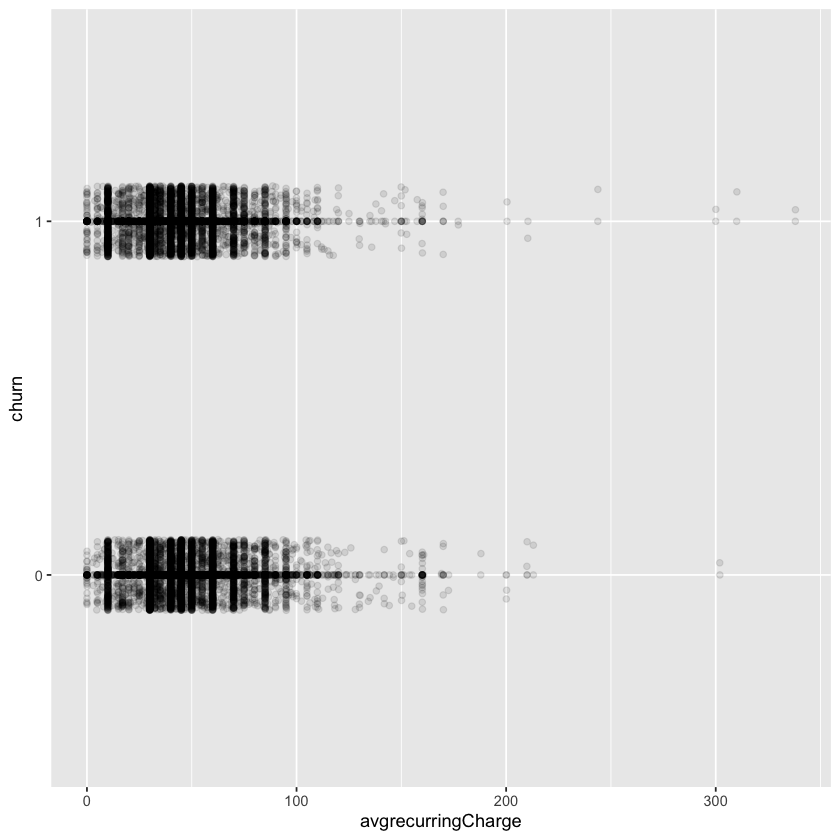

In [176]:
ggplot(dummy_df,aes(x=avgrecurringCharge,y=churn)) + geom_point(alpha=0.1) + geom_jitter(width = 0.1, height = 0.1,alpha=0.1)

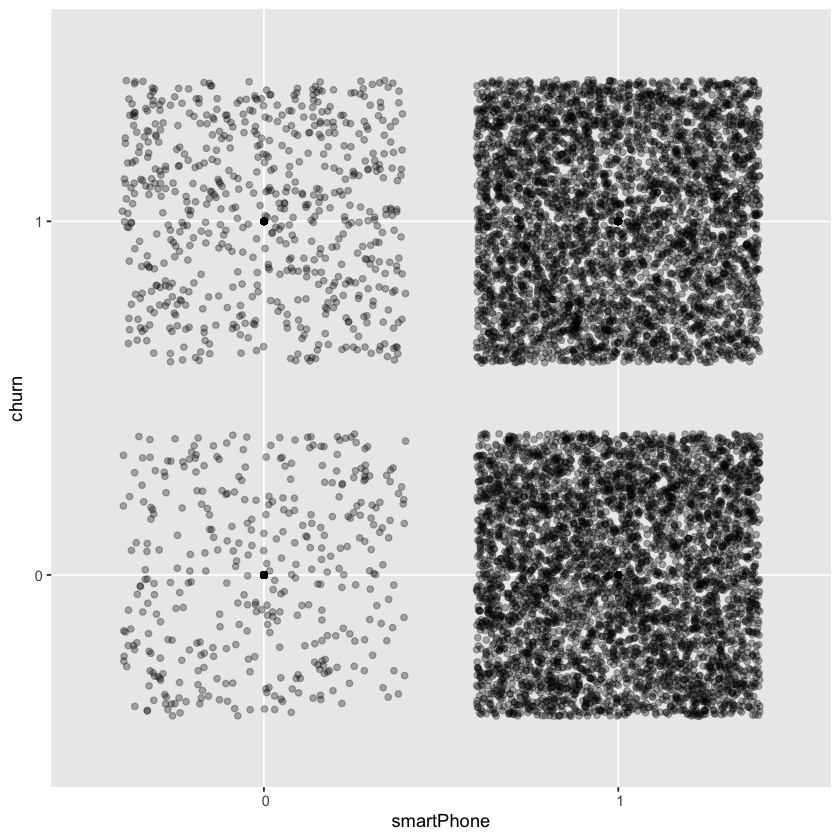

In [178]:
ggplot(dummy_df,aes(x=smartPhone,y=churn)) + geom_point(alpha=0.3) + geom_jitter(alpha=0.3)

As we can see, the most correlating variables with Churn are:


1. Handset Age
2. Number of Retention Calls
3. Number of Retention Offers Accepted
4. Average recurring Charge
5. Smartphone


Nevertheless, there is a weak correlation between them, which tells us that we should take different approaches in finding the variables that would be telling us more of what matters. Perhaps we should employ different machine learning algorithms that deal in non-parametric way, but even then we should be wary - for example, KNN classifier works poorly in the datasets of high dimensions.